In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# load data
# df = pd.read_csv("Article_top_Data.csv")
# df = pd.read_csv("Article_top10_Data.csv")
df = pd.read_csv("laugenbreze.csv")
# group by Date
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
1,4,20,2022-01-03,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,0,9,BO-Laugenbreze 1ST
2,267,1774,2022-01-03,1001,2,563,13,07:56:26,421791,BO-Laugenbreze 1ST,2.0,2022-01-03 07:56:26,1,0,7,BO-Laugenbreze 1ST
3,268,1775,2022-01-03,1001,2,563,14,07:56:26,421791,BO-Laugenbreze 1ST,5.0,2022-01-03 07:56:26,1,0,7,BO-Laugenbreze 1ST
4,269,1776,2022-01-03,1001,2,563,15,07:56:26,421791,BO-Laugenbreze 1ST,5.0,2022-01-03 07:56:26,1,0,7,BO-Laugenbreze 1ST


In [3]:
df['Day'] = df['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )

In [4]:
# group by Hour
df['Hour'] = df['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
                                            else 1 if int(x)>=9 and int(x)<=12
                                            else 2 if int(x)>=13 and int(x)<=16
                                            else 3)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import time

In [6]:
article = df.loc[:,['StoreNumber', 'Quantity', 'Month', 'Day','Hour']][df.Group == 'BO-Laugenbreze 1ST']
article = article.groupby(['StoreNumber', 'Month', 'Day','Hour'])['Quantity'].sum().reset_index()
article.head()

,StoreNumber,Month,Day,Hour,Quantity
0,1001,1,0,0,66.0
1,1001,1,0,1,154.0
2,1001,1,0,2,101.0
3,1001,1,0,3,33.0
4,1001,1,1,0,467.0


In [7]:
x = article.drop('Quantity', axis=1)
encoder = LabelEncoder()
for col in x.columns:
    x[col] = encoder.fit_transform(x[col])
y = article['Quantity']

# scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# x = pd.DataFrame(scaler.fit_transform(x), columns=x.keys())
x.head()

,StoreNumber,Month,Day,Hour
0,0,0,0,0
1,0,0,0,1
2,0,0,0,2
3,0,0,0,3
4,0,0,1,0


In [8]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:

# Neural Network
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_mlp = mlp.predict(x_test)

# Random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_rfc = rf.predict(x_test)

# Extra tree
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_et = et.predict(x_test)


In [10]:
print(f'MLP score={mlp.score(x_train, y_train)}')
print(f'Random forest score={rf.score(x_train, y_train)}')
print(f'Extra tree score={et.score(x_train, y_train)}')


MLP score=0.02079741659830292
Random forest score=0.9775234833273008
Extra tree score=0.9999987801525411


In [11]:
# MLP
print("MLP--------------------")
print(mse(y_test, y_mlp, squared=False))
print(r2(y_test, y_mlp))
# Random forest
print("Random forest--------------------")
print(mse(y_test, y_rfc, squared=False))
print(r2(y_test, y_rfc))
# Extra tree
print("Extra tree--------------------")
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfc}).reset_index().drop(columns='index')
print(mse(y_test, y_et, squared=False))
print(r2(y_test, y_et))

MLP--------------------
211.4781030125266
0.00039642707120990384
Random forest--------------------
84.45033391233092
0.8405958110983827
Extra tree--------------------
88.97178798128554
0.8230699402580406


In [49]:
font_title = {"family" : "serif",
              #"color" : "darkblue",
              "weight" : "bold",
              "size" : 36}

font_text = {"family" : "serif",
             #"color" : "black",
             "weight" : "normal",
             "size" : 36}

font_annot = {"family" : "serif",
              #"color" : "black",
              "weight" : "normal",
              "size" : 8}

sns.set(font = "serif", 
        font_scale = 3., 
        style = "ticks")

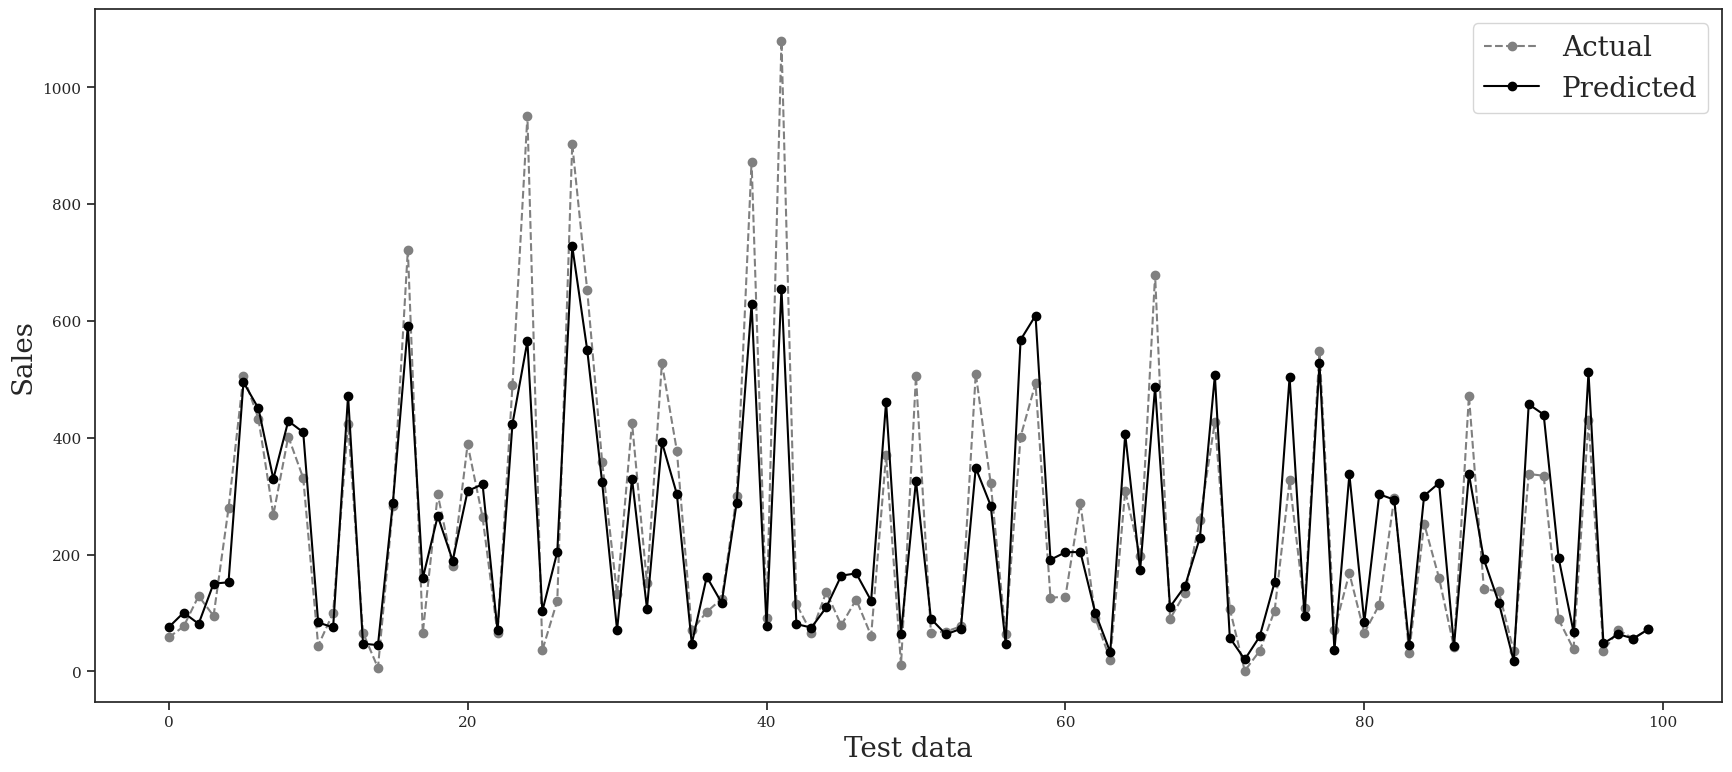

In [13]:
ax = data.head(100).plot(figsize=(21,9), style=['--o', '-o'], color=["gray", "black"])
ax.set_xlabel("Test data", fontsize=20)
ax.set_ylabel("Sales", fontsize=20)
ax.legend(fontsize=20)

#plt.savefig("Breze_prediction.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [14]:
data.head(20).Actual

0      58.0
1      77.0
2     129.0
3      95.0
4     279.0
5     506.0
6     433.0
7     268.0
8     402.0
9     331.0
10     44.0
11    100.0
12    424.0
13     66.0
14      6.0
15    283.0
16    722.0
17     66.0
18    303.0
19    180.0
Name: Actual, dtype: float64

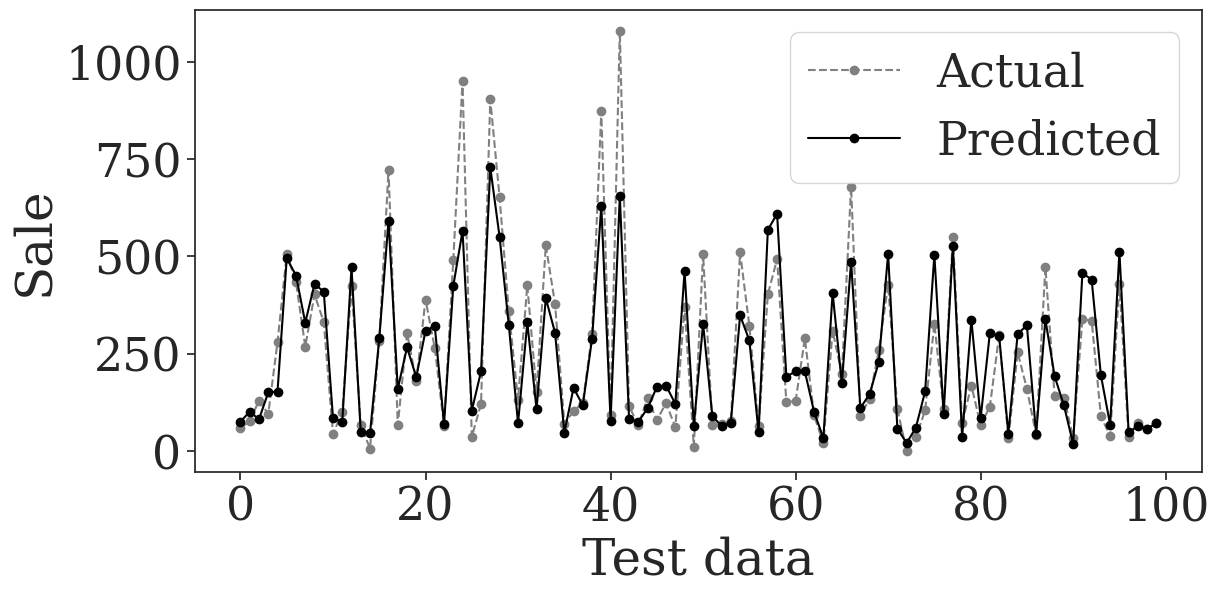

In [48]:
plt.figure(figsize=(13,6))
plt.plot(data.head(100).Actual, marker = "o", linestyle = "--", label = 'Actual', color = "gray")
plt.plot(data.head(100).Predicted, marker = "o", linestyle = "-", label = 'Predicted', color = "black")
plt.xlabel("Test data", rotation = 0, **font_text)
plt.ylabel("Sale", rotation = 90, **font_text)
# plt.title("K-means Clustering", rotation = 0, **font_title)
plt.legend()
plt.savefig("Breze_prediction.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
df = pd.read_csv("Article_top_Data.csv")
df = df.drop_duplicates(subset=['Date','StoreNumber', 'CashRegisterNumber', 'ReceiptNumber', 'Group'], keep='first')


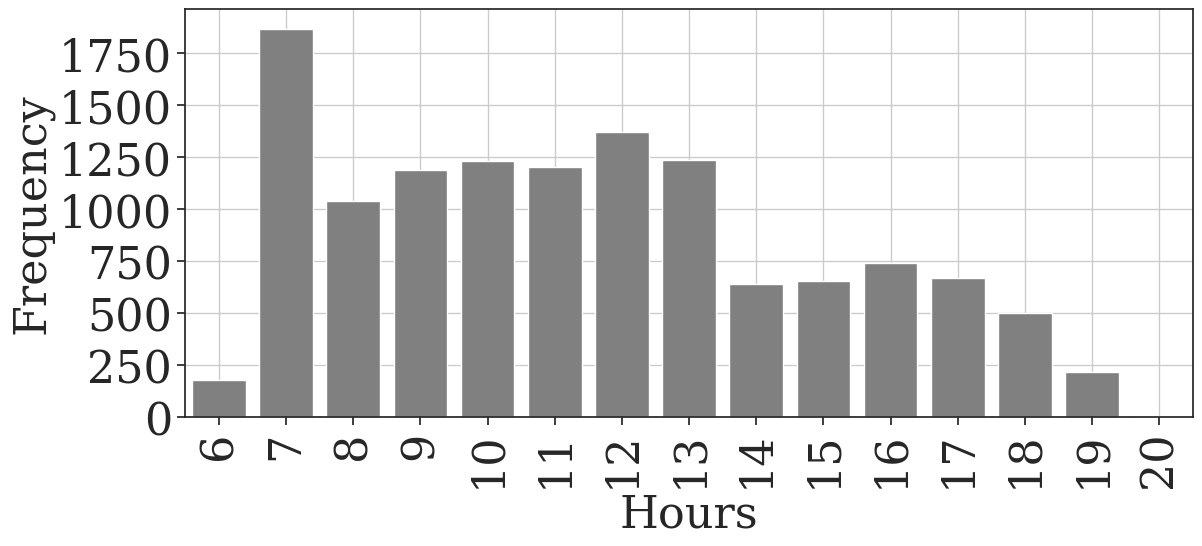

In [81]:
# article = df[(df.Group == "BO-Laugenbreze 1ST") & (df.StoreNumber==1223)].reset_index()
# fig, ax = plt.subplots(figsize=(21, 9))  # Create a single subplot
# plt.suptitle(f"'BO-Laugenbreze 1ST'", fontsize=20)

# # Hourly sales
# hourly_sales = article.groupby('Hour').count()
# sns.barplot(
#     ax=ax,
#     y=hourly_sales['Quantity'],
#     x=hourly_sales.index,
#     data=hourly_sales,
#     color='gray')
# ax.set_ylabel("Frequency", fontsize=20)
# ax.set_xlabel('Hours', fontsize=20)
# ax.grid(True)
font_title = {"family" : "serif",
              #"color" : "darkblue",
              "weight" : "bold",
              "size" : 30}

font_text = {"family" : "serif",
             #"color" : "black",
             "weight" : "normal",
             "size" : 32}

font_annot = {"family" : "serif",
              #"color" : "black",
              "weight" : "normal",
              "size" : 8}

sns.set(font = "serif", 
        font_scale = 2, 
        style = "ticks")


article = df[(df.Group == "BO-Laugenbreze 1ST") & (df.StoreNumber==1223)].reset_index()
#fig, ax = plt.subplots(figsize=(21, 9))  # Create a single subplot
#plt.suptitle(f"'BO-Laugenbreze 1ST'", fontsize=20)

# Hourly sales
hourly_sales = article.groupby('Hour').count()

plt.figure(figsize = (13,5.3))
s = sns.barplot(
    #ax=ax,
    y=hourly_sales['Quantity'],
    x=hourly_sales.index,
    data=hourly_sales,
    color='gray')
s.set_yticklabels(s.get_yticklabels(), rotation = 0, **font_text)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, **font_text)
ticks = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
s.set_yticks(ticks)
s.set_yticklabels(ticks)

plt.xlabel('Hours', **font_text)
plt.ylabel('Frequency', **font_text)
#plt.title("BO-Laugenbreze 1ST", **font_title)
#plt.legende()

plt.grid()
plt.savefig("Breze_observation.pdf", format="pdf", bbox_inches="tight")

plt.show()  # Display the plot